# Upright pendulum

In [1]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import warnings
pd.set_option('display.float_format', '{:0.8f}'.format)
import operator

In [2]:
from sklearn.preprocessing import FunctionTransformer


def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [3]:
# hour_df["hour_sin"] = sin_transformer(24).fit_transform(hour_df)["hour"]
# hour_df["hour_cos"] = cos_transformer(24).fit_transform(hour_df)["hour"]

Upright Pendulum link

https://www.12000.org/my_notes/cart_motion/report.htm

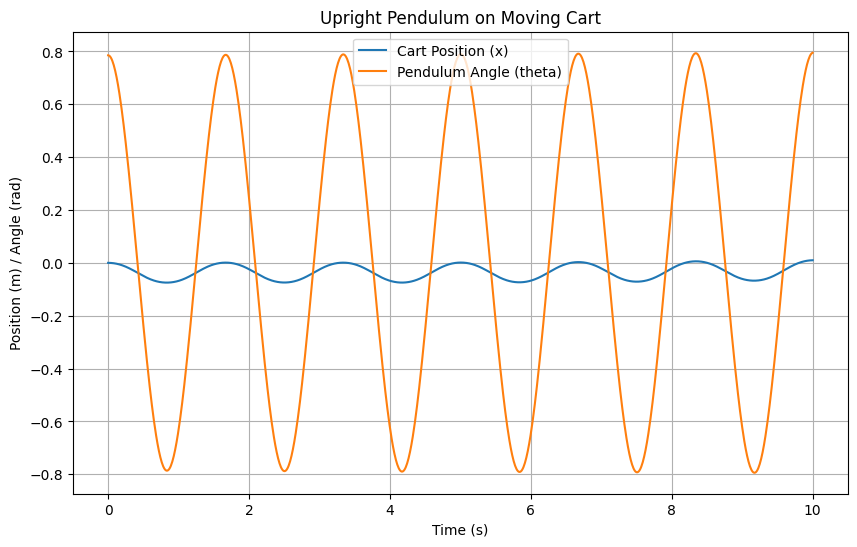

In [93]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters
m_c = 1.0  # Mass of the cart (kg)
m_p = 0.1  # Mass of the pendulum (kg)
l = 0.5    # Length of the pendulum (m)
g = 9.81   # Acceleration due to gravity (m/s^2)

# Define the right-hand side of the system of ODEs
def rhs(t, y, F):
    x, u, theta, omega = y
    a = m_p * l
    b = m_c + m_p
    dxdt = u
    dudt = (F / m_c) - ((a * omega ** 2 * np.sin(theta) + g * np.sin(theta) * np.cos(theta)) / (b * np.sin(theta) ** 2 + m_c / m_p))
    dthetadt = omega
    domegadt = (-g * np.sin(theta) - (a * omega ** 2 * np.sin(theta) * np.cos(theta) + b * g * np.sin(theta)) / (l * (b * np.sin(theta) ** 2 + m_c / m_p))) / np.cos(theta)
    return [dxdt, dudt, dthetadt, domegadt]

# Initial conditions
y0 = [0.0, 0.0, np.pi / 4, 0.0]  # [x0, u0, theta0, omega0]

# Time span
t_span = (0.0, 10.0)  # from 0 to 10 seconds

# External force (if any)
F = 0.0  # set external force to 0

# Solve the ODEs
sol = solve_ivp(rhs, t_span, y0, args=(F,), t_eval=np.linspace(t_span[0], t_span[1], 1000))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Cart Position (x)')
plt.plot(sol.t, sol.y[2], label='Pendulum Angle (theta)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m) / Angle (rad)')
plt.title('Upright Pendulum on Moving Cart')
plt.legend()
plt.grid(True)
plt.show()

## Corrected formulation

### Non-rational system

- Note that we are not considering damping as part of our formulation

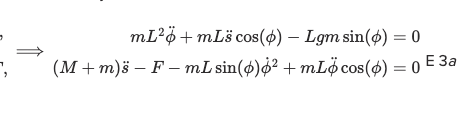

## Rational- system

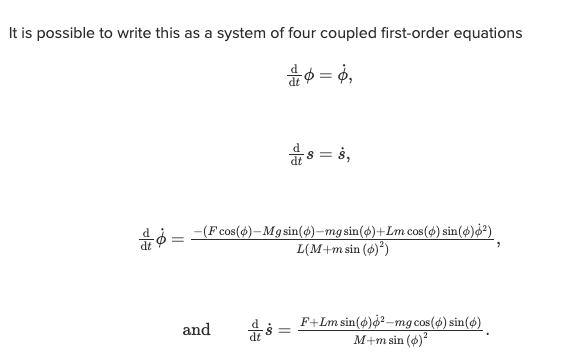

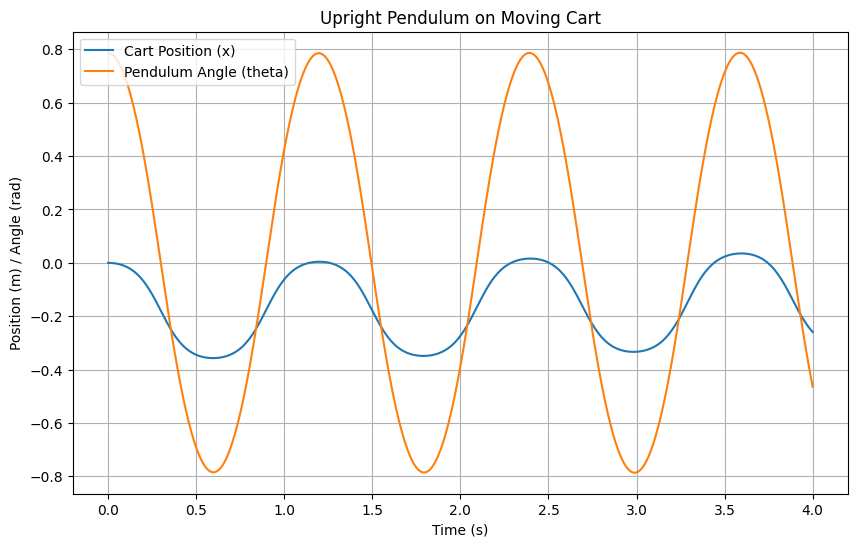

In [94]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters
m_c = 1.0  # Mass of the cart (kg)
m_p = 1  # Mass of the pendulum (kg)
l = 1    # Length of the pendulum (m)
g = 9.81   # Acceleration due to gravity (m/s^2)



# Initial conditions
y0 = [0.0, 0.0, np.pi / 4, 0.0]  # [x0, u0, theta0, omega0]

# Time span
t_span = (0.0, 4)  # from 0 to 10 seconds

# External force (if any)
F = 0.0  # set external force to 0

# Solve the ODEs
sol = solve_ivp(rhs, t_span, y0, args=(F,), t_eval=np.linspace(t_span[0], t_span[1], 1000))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Cart Position (x)')
plt.plot(sol.t, sol.y[2], label='Pendulum Angle (theta)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m) / Angle (rad)')
plt.title('Upright Pendulum on Moving Cart')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
IC_df = pd.read_csv("parameters/init_cond_pend.csv")

In [96]:
IC_df

,x,u,theta,omega
0,0,0,0.78539816,0
1,-1,0,0.78539816,0
2,-10,1,0.20000000,1
3,-9,0,0.78539816,0
4,-10,1,-0.78539816,1


In [97]:
params_df = pd.read_csv("parameters/pend_param.csv")
params_df


,l,m_c,m_p
0,1,1,1


In [98]:
g = 9.81   # Acceleration due to gravity (m/s^2)


### Synthesizing data from different ICs

In [99]:
# Define the right-hand side of the system of ODEs
def pendulum_rhs(t, y, m_c, m_p, l, F):
    x, u, theta, omega = y
    # a = m_p * l
    b = m_c + m_p
    
    dxdt = u

    dudt = (F+ l*m_p*np.sin(theta)*omega**2 - m_p*g*np.cos(theta)*np.sin(theta))/(m_c + m_p*(np.sin(theta))**2)
        
    # (F / m_c) - ((a * omega ** 2 * np.sin(theta) + g * np.sin(theta) * np.cos(theta)) / (b * np.sin(theta) ** 2 + m_c / m_p))
    dthetadt = omega

    domegadt = -(F*np.cos(theta) - b*g*np.sin(theta) + l*m_p*np.cos(theta)*np.sin(theta)*(omega**2))/(l*(m_c + m_p*(np.sin(theta))**2))
    
    # (-g * np.sin(theta) - (a * omega ** 2 * np.sin(theta) * np.cos(theta) + b * g * np.sin(theta)) / (l * (b * np.sin(theta) ** 2 + m_c / m_p))) / np.cos(theta)
    
    return [dxdt, dudt, dthetadt, domegadt]

In [133]:
F =0.0 # Force acting on the cart. 

# Time span
t_span = (0.0, 6)  # from 0 to 10 seconds
#Valuation points
t_eval_ = np.linspace(t_span[0], t_span[1], 1000)
data_matrix_df_list = []


for param_index in params_df.index:
    params = params_df.loc[param_index]
    # Define parameters
    m_c = params['m_c']  # Mass of the cart (kg)
    m_p = params['m_p']  # Mass of the pendulum (kg)
    l = params['l']    # Length of the pendulum (m)
    for IC_index in IC_df.index:
        IC = IC_df.loc[IC_index]
        y0 = IC.values
        # Solve the ODEs
        sol = solve_ivp(pendulum_rhs, t_span, y0, args=(m_c, m_p, l, F), t_eval=t_eval_)
        sol_df = pd.DataFrame(sol.y.T, columns=IC.keys())
        data_matrix_df_list.append(sol_df)
        # if IC_index == 0:
        #     # Plot the results
        #     plt.figure(figsize=(10, 6))
        #     plt.plot(sol.t, sol.y[0], label='Cart Position (x)')
        #     plt.plot(sol.t, sol.y[2], label='Pendulum Angle (theta)')
        #     plt.xlabel('Time (s)')
        #     plt.ylabel('Position (m) / Angle (rad)')
        #     plt.title('Upright Pendulum on Moving Cart')
        #     plt.legend()
        #     plt.grid(True)
        #     plt.show()

data_matrix_df = pd.concat(data_matrix_df_list, ignore_index=True)
data_matrix_df

,x,u,theta,omega
0,0.00000000,0.00000000,0.78539816,0.00000000
1,-0.00005897,-0.01963600,0.78556498,0.05554826
2,-0.00023582,-0.03925015,0.78606540,0.11109034
3,-0.00053033,-0.05882024,0.78689936,0.16662019
4,-0.00094216,-0.07832444,0.78806678,0.22213160
...,...,...,...,...
4995,-1.85460132,1.49595916,-0.59998761,-0.21570440
4996,-1.84554459,1.51661321,-0.60144211,-0.26606024
4997,-1.83636604,1.53720023,-0.60319737,-0.31641745
4998,-1.82706672,1.55771048,-0.60525298,-0.36677761


<Axes: >

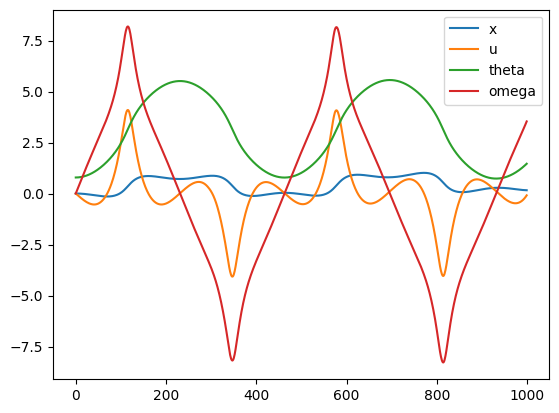

In [135]:
data_matrix_df_list[0].plot()

### Calculating the derivatives of data

In [136]:
from dae_finder import der_matrix_calculator

In [137]:
delta_t = t_eval_[1]- t_eval_[0]
data_matrix_features = data_matrix_df_list[0].columns
for ind, data_matrix_ in enumerate(data_matrix_df_list):
    derr_matrix = der_matrix_calculator(data_matrix_, delta_t)
    data_matrix_df_list[ind] = pd.concat([data_matrix_.iloc[:-1], derr_matrix], axis=1)

data_matrix_df_appended = pd.concat(data_matrix_df_list, ignore_index=True)
data_matrix_df_appended

,x,u,theta,omega,d(x) /dt,d(u) /dt,d(theta) /dt,d(omega) /dt
0,0.00000000,0.00000000,0.78539816,0.00000000,-0.00981891,-3.26939387,0.02777439,9.24878526
1,-0.00005897,-0.01963600,0.78556498,0.05554826,-0.02944574,-3.26575552,0.08332006,9.24775677
2,-0.00023582,-0.03925015,0.78606540,0.11109034,-0.04903485,-3.25842124,0.13885523,9.24572011
3,-0.00053033,-0.05882024,0.78689936,0.16662019,-0.06856962,-3.24744780,0.19437476,9.24264891
4,-0.00094216,-0.07832444,0.78806678,0.22213160,-0.08803155,-3.23285808,0.24987332,9.23852449
...,...,...,...,...,...,...,...,...
4990,-1.86353528,1.47524822,-0.59883423,-0.16534855,1.48750445,3.44837154,-0.19203728,-8.38424915
4991,-1.85460132,1.49595916,-0.59998761,-0.21570440,1.50794481,3.43889901,-0.24217511,-8.38424737
4992,-1.84554459,1.51661321,-0.60144211,-0.26606024,1.52822896,3.42773902,-0.29225062,-8.38447540
4993,-1.83636604,1.53720023,-0.60319737,-0.31641745,1.54833700,3.41495758,-0.34225962,-8.38496574


In [138]:
data_matrix_df = data_matrix_df_appended[data_matrix_features]
data_matrix_df = pd.concat([data_matrix_df, data_matrix_df_appended[["d(u) /dt"]]], axis=1)
data_matrix_df

,x,u,theta,omega,d(u) /dt
0,0.00000000,0.00000000,0.78539816,0.00000000,-3.26939387
1,-0.00005897,-0.01963600,0.78556498,0.05554826,-3.26575552
2,-0.00023582,-0.03925015,0.78606540,0.11109034,-3.25842124
3,-0.00053033,-0.05882024,0.78689936,0.16662019,-3.24744780
4,-0.00094216,-0.07832444,0.78806678,0.22213160,-3.23285808
...,...,...,...,...,...
4990,-1.86353528,1.47524822,-0.59883423,-0.16534855,3.44837154
4991,-1.85460132,1.49595916,-0.59998761,-0.21570440,3.43889901
4992,-1.84554459,1.51661321,-0.60144211,-0.26606024,3.42773902
4993,-1.83636604,1.53720023,-0.60319737,-0.31641745,3.41495758


## Forming candiate library

In [139]:
from sklearn.preprocessing import FunctionTransformer
from copy import deepcopy

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))


data_matrix_df_with_trig = deepcopy(data_matrix_df)
data_matrix_df_with_trig["sin(theta)"] = sin_transformer(1).fit_transform(data_matrix_df_with_trig)["theta"]
data_matrix_df_with_trig["cos(theta)"] = cos_transformer(1).fit_transform(data_matrix_df_with_trig)["theta"]

In [140]:
data_matrix_df_with_trig

,x,u,theta,omega,d(u) /dt,sin(theta),cos(theta)
0,0.00000000,0.00000000,0.78539816,0.00000000,-3.26939387,-0.97536797,0.22058404
1,-0.00005897,-0.01963600,0.78556498,0.05554826,-3.26575552,-0.97513624,0.22160622
2,-0.00023582,-0.03925015,0.78606540,0.11109034,-3.25842124,-0.97443464,0.22467118
3,-0.00053033,-0.05882024,0.78689936,0.16662019,-3.24744780,-0.97324400,0.22977407
4,-0.00094216,-0.07832444,0.78806678,0.22213160,-3.23285808,-0.97153242,0.23690666
...,...,...,...,...,...,...,...
4990,-1.86353528,1.47524822,-0.59883423,-0.16534855,3.44837154,0.58184369,-0.81330063
4991,-1.85460132,1.49595916,-0.59998761,-0.21570440,3.43889901,0.58772226,-0.80906276
4992,-1.84554459,1.51661321,-0.60144211,-0.26606024,3.42773902,0.59509157,-0.80365790
4993,-1.83636604,1.53720023,-0.60319737,-0.31641745,3.41495758,0.60391844,-0.79704612


In [141]:
from dae_finder import PolyFeatureMatrix

poly_feature_ob = PolyFeatureMatrix(2)

candidate_lib_full = poly_feature_ob.fit_transform(data_matrix_df_with_trig)

In [142]:
candidate_lib_full

,1,x,u,theta,omega,d(u) /dt,sin(theta),cos(theta),x^2,x u,...,omega^2,omega d(u) /dt,omega sin(theta),omega cos(theta),d(u) /dt^2,d(u) /dt sin(theta),d(u) /dt cos(theta),sin(theta)^2,sin(theta) cos(theta),cos(theta)^2
0,1.00000000,0.00000000,0.00000000,0.78539816,0.00000000,-3.26939387,-0.97536797,0.22058404,0.00000000,0.00000000,...,0.00000000,-0.00000000,-0.00000000,0.00000000,10.68893628,3.18886207,-0.72117611,0.95134268,-0.21515061,0.04865732
1,1.00000000,-0.00005897,-0.01963600,0.78556498,0.05554826,-3.26575552,-0.97513624,0.22160622,0.00000000,0.00000116,...,0.00308561,-0.18140704,-0.05416712,0.01230984,10.66515910,3.18455655,-0.72371174,0.95089068,-0.21609626,0.04910932
2,1.00000000,-0.00023582,-0.03925015,0.78606540,0.11109034,-3.25842124,-0.97443464,0.22467118,0.00000006,0.00000926,...,0.01234106,-0.36197913,-0.10825028,0.02495880,10.61730899,3.17511852,-0.73207334,0.94952286,-0.21892738,0.05047714
3,1.00000000,-0.00053033,-0.05882024,0.78689936,0.16662019,-3.24744780,-0.97324400,0.22977407,0.00000028,0.00003119,...,0.02776229,-0.54109038,-0.16216210,0.03828500,10.54591724,3.16055908,-0.74617929,0.94720388,-0.22362623,0.05279612
4,1.00000000,-0.00094216,-0.07832444,0.78806678,0.22213160,-3.23285808,-0.97153242,0.23690666,0.00000089,0.00007379,...,0.04934245,-0.71811993,-0.21580805,0.05262445,10.45137133,3.14082642,-0.76588560,0.94387524,-0.23016250,0.05612476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,1.00000000,-1.86353528,1.47524822,-0.59883423,-0.16534855,3.44837154,0.58184369,-0.81330063,3.47276374,-2.74917710,...,0.02734014,-0.57018324,-0.09620701,0.13447808,11.89126626,2.00641323,-2.80456275,0.33854208,-0.47321384,0.66145792
4991,1.00000000,-1.85460132,1.49595916,-0.59998761,-0.21570440,3.43889901,0.58772226,-0.80906276,3.43954606,-2.77440783,...,0.04652839,-0.74178566,-0.12677428,0.17451840,11.82602637,2.02111748,-2.78228512,0.34541745,-0.47550419,0.65458255
4992,1.00000000,-1.84554459,1.51661321,-0.60144211,-0.26606024,3.42773902,0.59509157,-0.80365790,3.40603485,-2.79897730,...,0.07078805,-0.91198508,-0.15833021,0.21382142,11.74939481,2.03981861,-2.75472954,0.35413398,-0.47825004,0.64586602
4993,1.00000000,-1.83636604,1.53720023,-0.60319737,-0.31641745,3.41495758,0.60391844,-0.79704612,3.37224024,-2.82286230,...,0.10012000,-1.08055218,-0.19109033,0.25219930,11.66193527,2.06235585,-2.72187869,0.36471748,-0.48135085,0.63528252


## Testing dynamics finding 

In [143]:
refined_candid_lib = candidate_lib_full.drop(['1'], axis=1)
# refined_candid_lib = pd.concat([refined_candid_lib, dummy_der[['d(omega) /dt']]], axis=1)

In [144]:
refined_candid_lib

,x,u,theta,omega,d(u) /dt,sin(theta),cos(theta),x^2,x u,x theta,...,omega^2,omega d(u) /dt,omega sin(theta),omega cos(theta),d(u) /dt^2,d(u) /dt sin(theta),d(u) /dt cos(theta),sin(theta)^2,sin(theta) cos(theta),cos(theta)^2
0,0.00000000,0.00000000,0.78539816,0.00000000,-3.26939387,-0.97536797,0.22058404,0.00000000,0.00000000,0.00000000,...,0.00000000,-0.00000000,-0.00000000,0.00000000,10.68893628,3.18886207,-0.72117611,0.95134268,-0.21515061,0.04865732
1,-0.00005897,-0.01963600,0.78556498,0.05554826,-3.26575552,-0.97513624,0.22160622,0.00000000,0.00000116,-0.00004633,...,0.00308561,-0.18140704,-0.05416712,0.01230984,10.66515910,3.18455655,-0.72371174,0.95089068,-0.21609626,0.04910932
2,-0.00023582,-0.03925015,0.78606540,0.11109034,-3.25842124,-0.97443464,0.22467118,0.00000006,0.00000926,-0.00018537,...,0.01234106,-0.36197913,-0.10825028,0.02495880,10.61730899,3.17511852,-0.73207334,0.94952286,-0.21892738,0.05047714
3,-0.00053033,-0.05882024,0.78689936,0.16662019,-3.24744780,-0.97324400,0.22977407,0.00000028,0.00003119,-0.00041731,...,0.02776229,-0.54109038,-0.16216210,0.03828500,10.54591724,3.16055908,-0.74617929,0.94720388,-0.22362623,0.05279612
4,-0.00094216,-0.07832444,0.78806678,0.22213160,-3.23285808,-0.97153242,0.23690666,0.00000089,0.00007379,-0.00074248,...,0.04934245,-0.71811993,-0.21580805,0.05262445,10.45137133,3.14082642,-0.76588560,0.94387524,-0.23016250,0.05612476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,-1.86353528,1.47524822,-0.59883423,-0.16534855,3.44837154,0.58184369,-0.81330063,3.47276374,-2.74917710,1.11594872,...,0.02734014,-0.57018324,-0.09620701,0.13447808,11.89126626,2.00641323,-2.80456275,0.33854208,-0.47321384,0.66145792
4991,-1.85460132,1.49595916,-0.59998761,-0.21570440,3.43889901,0.58772226,-0.80906276,3.43954606,-2.77440783,1.11273781,...,0.04652839,-0.74178566,-0.12677428,0.17451840,11.82602637,2.02111748,-2.78228512,0.34541745,-0.47550419,0.65458255
4992,-1.84554459,1.51661321,-0.60144211,-0.26606024,3.42773902,0.59509157,-0.80365790,3.40603485,-2.79897730,1.10998824,...,0.07078805,-0.91198508,-0.15833021,0.21382142,11.74939481,2.03981861,-2.75472954,0.35413398,-0.47825004,0.64586602
4993,-1.83636604,1.53720023,-0.60319737,-0.31641745,3.41495758,0.60391844,-0.79704612,3.37224024,-2.82286230,1.10769117,...,0.10012000,-1.08055218,-0.19109033,0.25219930,11.66193527,2.06235585,-2.72187869,0.36471748,-0.48135085,0.63528252


## Refined candidate library is able to find the model 

In [155]:
from dae_finder import sequentialThLin

seq_th_model = sequentialThLin(fit_intercept=False, coef_threshold=0.2)

seq_th_model.fit(X=refined_candid_lib,  y=data_matrix_df_appended['d(omega) /dt'])

Sequential threshold converged in 2 iterations


In [156]:
dict(zip(seq_th_model.feature_names_in_, seq_th_model.coef_))

{'x': 0.0,
 'u': -0.8862858328390235,
 'theta': -0.9226343465499116,
 'omega': 0.0,
 'd(u) /dt': 0.982834851802011,
 'sin(theta)': -2.6428237348810573,
 'cos(theta)': 1.8230320637332926,
 'x^2': 0.0,
 'x u': 0.0,
 'x theta': 0.0,
 'x omega': 0.0,
 'x d(u) /dt': 0.0,
 'x sin(theta)': 0.0,
 'x cos(theta)': 0.0,
 'u^2': 0.0,
 'u theta': 0.25626396743980084,
 'u omega': 0.0,
 'u d(u) /dt': 0.0,
 'u sin(theta)': 0.0,
 'u cos(theta)': -1.4111458004589432,
 'theta^2': 0.0,
 'theta omega': 0.0,
 'theta d(u) /dt': 0.0,
 'theta sin(theta)': 0.0,
 'theta cos(theta)': 0.0,
 'omega^2': 0.0,
 'omega d(u) /dt': 0.0,
 'omega sin(theta)': 0.0,
 'omega cos(theta)': 0.356548065003226,
 'd(u) /dt^2': 0.0,
 'd(u) /dt sin(theta)': 0.0,
 'd(u) /dt cos(theta)': 0.0,
 'sin(theta)^2': 3.4750148544685717,
 'sin(theta) cos(theta)': -0.6824578233848212,
 'cos(theta)^2': 2.288025479694738}

#### Using lasso

In [147]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler(with_std=True, with_mean=False)
scaled_cand_lib = pd.DataFrame(s_scaler.fit_transform(refined_candid_lib), columns=s_scaler.feature_names_in_)

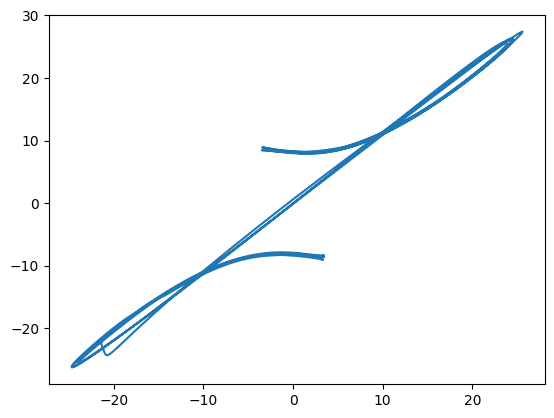

In [148]:
plt.plot(refined_candid_lib['d(u) /dt'][-990:], data_matrix_df_appended['d(omega) /dt'][-990:])

<Axes: >

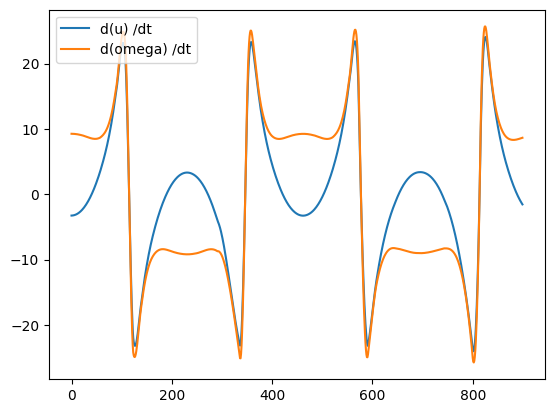

In [149]:
data_matrix_df_appended[["d(u) /dt", "d(omega) /dt"]][:900].plot()

In [150]:
data_matrix_df_appended["d(omega) /dt"]+refined_candid_lib["d(u) /dt cos(theta)"] - g*refined_candid_lib["sin(theta)"]

0       18.09596896
1       18.09013153
2       18.07285056
3       18.04399323
4       18.00337190
           ...     
4990   -16.89669853
4991   -16.93208782
4992   -16.97705329
4993   -17.03128433
4994   -17.09438376
Length: 4995, dtype: float64

In [151]:
refined_candid_lib["d(u) /dt cos(theta)"] - refined_candid_lib["d(u) /dt"] * refined_candid_lib["cos(theta)"]

0      0.00000000
1      0.00000000
2      0.00000000
3      0.00000000
4      0.00000000
          ...    
4990   0.00000000
4991   0.00000000
4992   0.00000000
4993   0.00000000
4994   0.00000000
Length: 4995, dtype: float64

In [120]:
from sklearn.linear_model import Lasso
alg_lasso = Lasso(fit_intercept=False)
alg_lasso.fit(X=scaled_cand_lib,  y=data_matrix_df_appended['d(omega) /dt'])

Lasso(fit_intercept=False)

In [121]:
dict(zip(alg_lasso.feature_names_in_, alg_lasso.coef_))

{'x': -0.0,
 'u': 0.0,
 'theta': -1.6293919115815618,
 'omega': 0.0,
 'd(u) /dt': 9.079251500282247,
 'sin(theta)': -0.7434031888116903,
 'cos(theta)': 0.0,
 'x^2': 0.0,
 'x u': -0.0,
 'x theta': 0.0,
 'x omega': -0.0,
 'x d(u) /dt': -0.0,
 'x sin(theta)': 0.0,
 'x cos(theta)': 0.0,
 'u^2': 0.0,
 'u theta': 0.0,
 'u omega': 0.0,
 'u d(u) /dt': 0.0,
 'u sin(theta)': -0.0,
 'u cos(theta)': -0.0,
 'theta^2': 0.0,
 'theta omega': 0.0,
 'theta d(u) /dt': 0.0,
 'theta sin(theta)': -0.0,
 'theta cos(theta)': 0.0,
 'omega^2': 0.0,
 'omega d(u) /dt': 0.0,
 'omega sin(theta)': 0.0,
 'omega cos(theta)': 0.0,
 'd(u) /dt^2': 0.0,
 'd(u) /dt sin(theta)': -0.0,
 'd(u) /dt cos(theta)': 0.0,
 'sin(theta)^2': 0.13023907045001745,
 'sin(theta) cos(theta)': -0.0,
 'cos(theta)^2': 0.0}

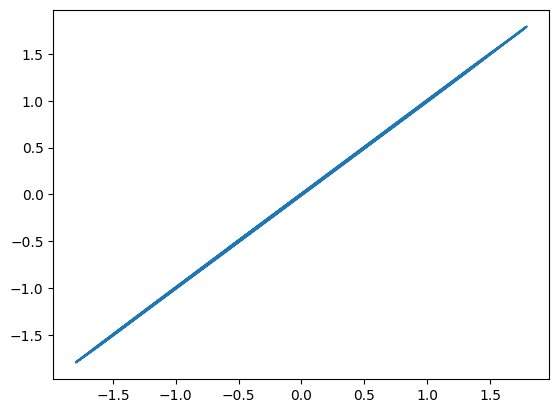

In [185]:
plt.plot(dummy_der["d(theta) /dt"], data_matrix_df_list[0]["omega"][:999])

<Axes: >

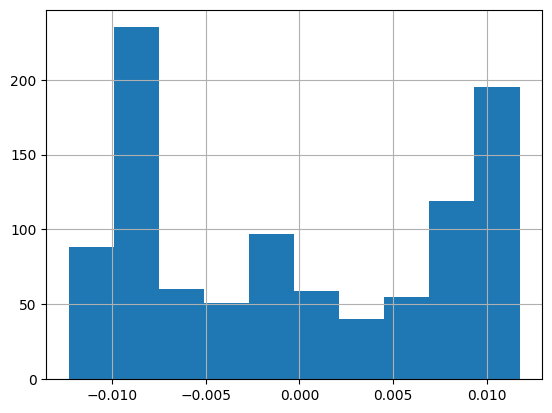

In [184]:
(dummy_der["d(theta) /dt"] - data_matrix_df_list[0]["omega"][:999]).hist()

<Axes: >

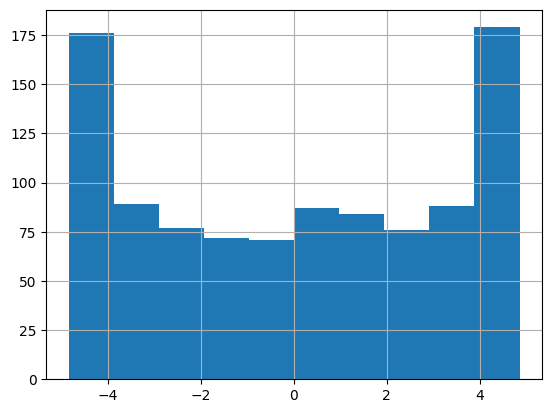

In [182]:
data_matrix_df_list[0]["u"][:999].hist()